In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#To classify tumors based on malignant on benign

In [2]:
df=pd.read_csv('Tensorflow_FILES/DATA/cancer_classification.csv')

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot: xlabel='benign_0__mal_1', ylabel='count'>

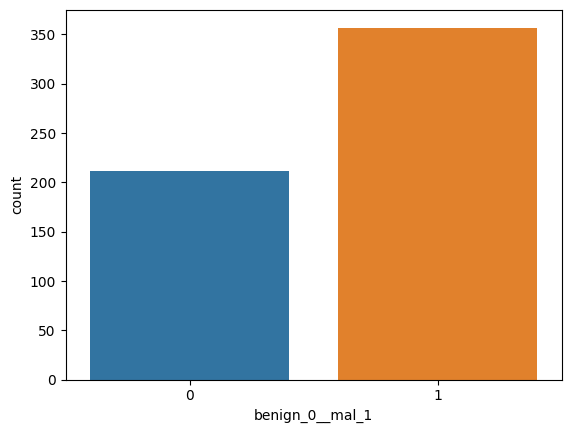

In [11]:
sns.countplot(x='benign_0__mal_1',data=df)

In [15]:
df.corr()['benign_0__mal_1'].sort_values(ascending=False)

benign_0__mal_1            1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

<AxesSubplot: >

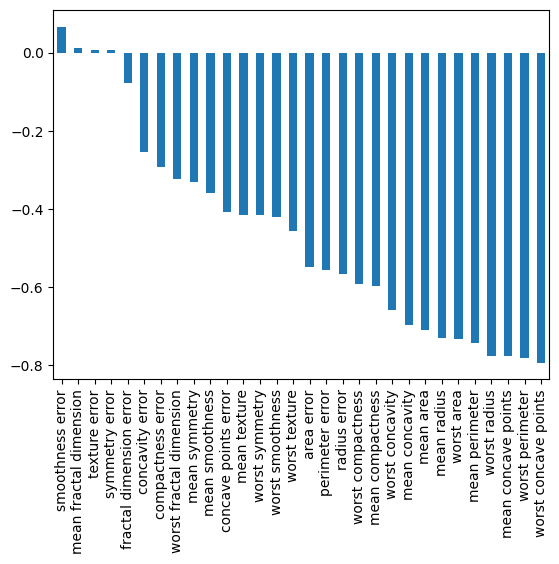

In [17]:
df.corr()['benign_0__mal_1'].sort_values(ascending=False)[1:].plot(kind='bar')

In [18]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler=MinMaxScaler()

In [23]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [26]:
X_train.shape

(398, 30)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [27]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
#FOR BINARY CLASSIFICATION BETWEEN MALIGNANT AND BENIGN
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [28]:
model.fit(X_train,y_train,verbose=1,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600


2023-01-03 11:46:45.763573: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


13/13 [==============================] - 0s 7ms/step - loss: 0.6659 - val_loss: 0.6426
Epoch 2/600
13/13 [==============================] - 0s 1ms/step - loss: 0.6217 - val_loss: 0.6068
Epoch 3/600
13/13 [==============================] - 0s 1ms/step - loss: 0.5834 - val_loss: 0.5722
Epoch 4/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5483 - val_loss: 0.5363
Epoch 5/600
13/13 [==============================] - 0s 1ms/step - loss: 0.5128 - val_loss: 0.5004
Epoch 6/600
13/13 [==============================] - 0s 2ms/step - loss: 0.4738 - val_loss: 0.4614
Epoch 7/600
13/13 [==============================] - 0s 1ms/step - loss: 0.4352 - val_loss: 0.4249
Epoch 8/600
13/13 [==============================] - 0s 1ms/step - loss: 0.3991 - val_loss: 0.3902
Epoch 9/600
13/13 [==============================] - 0s 1ms/step - loss: 0.3658 - val_loss: 0.3587
Epoch 10/600
13/13 [==============================] - 0s 1ms/step - loss: 0.3379 - val_loss: 0.3311
Epoch 11/600
13/13 [=

13/13 [==============================] - 0s 1ms/step - loss: 0.0410 - val_loss: 0.1249
Epoch 84/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0445 - val_loss: 0.1248
Epoch 85/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0404 - val_loss: 0.1251
Epoch 86/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0396 - val_loss: 0.1260
Epoch 87/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0405 - val_loss: 0.1252
Epoch 88/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0392 - val_loss: 0.1274
Epoch 89/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0395 - val_loss: 0.1261
Epoch 90/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0402 - val_loss: 0.1264
Epoch 91/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0394 - val_loss: 0.1271
Epoch 92/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0385 - val_loss: 0.1263
Epoch 93/600


13/13 [==============================] - 0s 1ms/step - loss: 0.0284 - val_loss: 0.1371
Epoch 165/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0297 - val_loss: 0.1355
Epoch 166/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0295 - val_loss: 0.1360
Epoch 167/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0295 - val_loss: 0.1371
Epoch 168/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0277 - val_loss: 0.1366
Epoch 169/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0284 - val_loss: 0.1374
Epoch 170/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0358 - val_loss: 0.1364
Epoch 171/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0351 - val_loss: 0.1368
Epoch 172/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0286 - val_loss: 0.1415
Epoch 173/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0299 - val_loss: 0.1382
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0240 - val_loss: 0.1599
Epoch 246/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.1584
Epoch 247/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0259 - val_loss: 0.1600
Epoch 248/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0236 - val_loss: 0.1590
Epoch 249/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0239 - val_loss: 0.1598
Epoch 250/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0215 - val_loss: 0.1637
Epoch 251/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0222 - val_loss: 0.1603
Epoch 252/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0205 - val_loss: 0.1597
Epoch 253/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0215 - val_loss: 0.1594
Epoch 254/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0247 - val_loss: 0.1612
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0155 - val_loss: 0.1996
Epoch 327/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0151 - val_loss: 0.1978
Epoch 328/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0155 - val_loss: 0.1965
Epoch 329/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0148 - val_loss: 0.2000
Epoch 330/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0148 - val_loss: 0.1999
Epoch 331/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0176 - val_loss: 0.2009
Epoch 332/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0266 - val_loss: 0.2025
Epoch 333/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0286 - val_loss: 0.1998
Epoch 334/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0306 - val_loss: 0.1974
Epoch 335/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0197 - val_loss: 0.1943
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0107 - val_loss: 0.2681
Epoch 408/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0113 - val_loss: 0.2621
Epoch 409/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0101 - val_loss: 0.2703
Epoch 410/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.2689
Epoch 411/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0130 - val_loss: 0.2735
Epoch 412/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0166 - val_loss: 0.2779
Epoch 413/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0132 - val_loss: 0.2705
Epoch 414/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.2759
Epoch 415/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0125 - val_loss: 0.2724
Epoch 416/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 0.2732
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0093 - val_loss: 0.3660
Epoch 489/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0071 - val_loss: 0.3657
Epoch 490/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0071 - val_loss: 0.3709
Epoch 491/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.3728
Epoch 492/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.3717
Epoch 493/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0059 - val_loss: 0.3817
Epoch 494/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0073 - val_loss: 0.3870
Epoch 495/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0070 - val_loss: 0.3787
Epoch 496/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.3775
Epoch 497/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.3764
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0044 - val_loss: 0.4638
Epoch 570/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0045 - val_loss: 0.4751
Epoch 571/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0043 - val_loss: 0.4734
Epoch 572/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.4721
Epoch 573/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0035 - val_loss: 0.4704
Epoch 574/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0032 - val_loss: 0.4765
Epoch 575/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0037 - val_loss: 0.4760
Epoch 576/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0040 - val_loss: 0.4711
Epoch 577/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0040 - val_loss: 0.4850
Epoch 578/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 0.4804
Epoc

In [30]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot: >

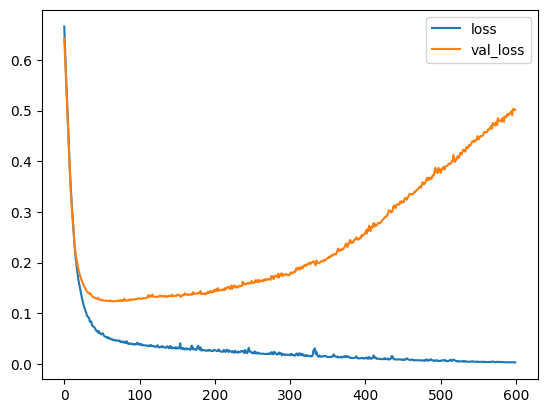

In [31]:
losses.plot() # Here we can notice the overfitting. i.e the val_loss begins to increase after certain number of epochs

In [ ]:
# HOW WE CAN STOP USING EARLY STOPPING

In [32]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
#FOR BINARY CLASSIFICATION BETWEEN MALIGNANT AND BENIGN
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 

In [35]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [36]:
model.fit(X_train,y_train,verbose=1,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6906 - val_loss: 0.6675
Epoch 2/600
13/13 [==============================] - 0s 1ms/step - loss: 0.6488 - val_loss: 0.6312
Epoch 3/600
13/13 [==============================] - 0s 2ms/step - loss: 0.6100 - val_loss: 0.5942
Epoch 4/600
13/13 [==============================] - 0s 1ms/step - loss: 0.5701 - val_loss: 0.5540
Epoch 5/600
13/13 [==============================] - 0s 1ms/step - loss: 0.5283 - val_loss: 0.5110
Epoch 6/600
13/13 [==============================] - 0s 1ms/step - loss: 0.4835 - val_loss: 0.4691
Epoch 7/600
13/13 [==============================] - 0s 1ms/step - loss: 0.4377 - val_loss: 0.4230
Epoch 8/600
13/13 [==============================] - 0s 1ms/step - loss: 0.3940 - val_loss: 0.3809
Epoch 9/600
13/13 [==============================] - 0s 1ms/step - loss: 0.3522 - val_loss: 0.3402
Epoch 10/600
13/13 [==============================] - 0s 1ms/step - loss: 0.3147 - val_loss: 0.3077
Epoch 11/

13/13 [==============================] - 0s 1ms/step - loss: 0.0442 - val_loss: 0.1278
Epoch 84/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0447 - val_loss: 0.1215
Epoch 85/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0434 - val_loss: 0.1236
Epoch 86/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0424 - val_loss: 0.1232
Epoch 87/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0437 - val_loss: 0.1225
Epoch 88/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0427 - val_loss: 0.1238
Epoch 88: early stopping


<AxesSubplot: >

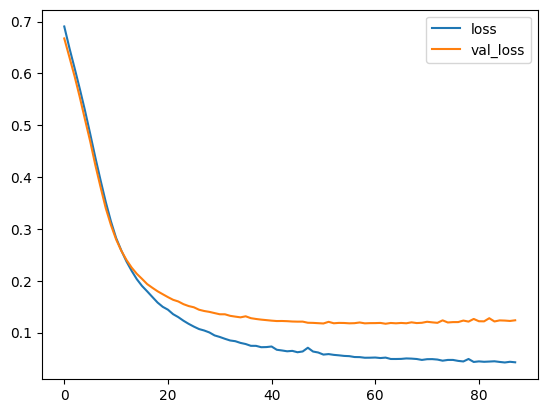

In [38]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
# Further preventing overfitting by adding dropout layers

In [39]:
from tensorflow.keras.layers import Dropout

In [40]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(rate=.5)) #rate is the percent of neurons to turn of randomly  between - .2 or .5

model.add(Dense(15,activation='relu'))
model.add(Dropout(rate=.5))

#FOR BINARY CLASSIFICATION BETWEEN MALIGNANT AND BENIGN
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [41]:
model.fit(X_train,y_train,verbose=1,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop]) #early stopping still combined

Epoch 1/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6948 - val_loss: 0.6559
Epoch 2/600
13/13 [==============================] - 0s 1ms/step - loss: 0.6670 - val_loss: 0.6353
Epoch 3/600
13/13 [==============================] - 0s 1ms/step - loss: 0.6556 - val_loss: 0.6126
Epoch 4/600
13/13 [==============================] - 0s 2ms/step - loss: 0.6135 - val_loss: 0.5897
Epoch 5/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5952 - val_loss: 0.5622
Epoch 6/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5630 - val_loss: 0.5364
Epoch 7/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5491 - val_loss: 0.5088
Epoch 8/600
13/13 [==============================] - 0s 1ms/step - loss: 0.5276 - val_loss: 0.4834
Epoch 9/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5109 - val_loss: 0.4611
Epoch 10/600
13/13 [==============================] - 0s 1ms/step - loss: 0.4866 - val_loss: 0.4301
Epoch 11/

13/13 [==============================] - 0s 1ms/step - loss: 0.1040 - val_loss: 0.1119
Epoch 84/600
13/13 [==============================] - 0s 1ms/step - loss: 0.1183 - val_loss: 0.1097
Epoch 85/600
13/13 [==============================] - 0s 1ms/step - loss: 0.1085 - val_loss: 0.1096
Epoch 86/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0957 - val_loss: 0.1086
Epoch 87/600
13/13 [==============================] - 0s 1ms/step - loss: 0.1124 - val_loss: 0.1135
Epoch 88/600
13/13 [==============================] - 0s 1ms/step - loss: 0.1128 - val_loss: 0.1156
Epoch 89/600
13/13 [==============================] - 0s 1ms/step - loss: 0.1026 - val_loss: 0.1093
Epoch 90/600
13/13 [==============================] - 0s 1ms/step - loss: 0.1048 - val_loss: 0.1155
Epoch 91/600
13/13 [==============================] - 0s 1ms/step - loss: 0.1252 - val_loss: 0.1079
Epoch 92/600
13/13 [==============================] - 0s 1ms/step - loss: 0.1008 - val_loss: 0.1059
Epoch 93/600


<AxesSubplot: >

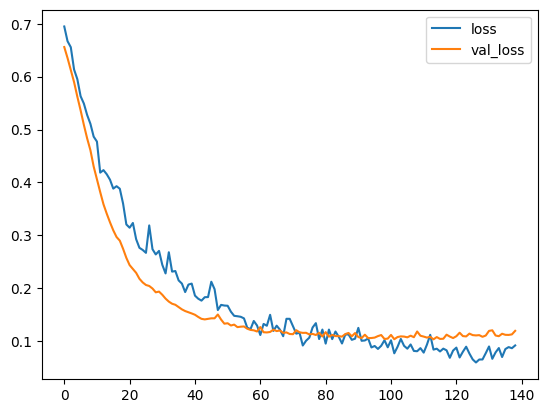

In [43]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [48]:
predictions=model.predict(X_test)

6/6 [==============================] - 0s 697us/step


In [50]:
for i in range(0,len(predictions)):
    if(predictions[i]<.5):
        predictions[i]=0
    else:
        predictions[i]=1

In [62]:

predictions

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],

In [63]:
from sklearn.metrics import classification_report,confusion_matrix

In [64]:
pd.DataFrame(classification_report(y_test,predictions,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.969697,0.980952,0.976608,0.975325,0.976608
recall,0.969697,0.980952,0.976608,0.975325,0.976608
f1-score,0.969697,0.980952,0.976608,0.975325,0.976608
support,66.000000,105.000000,0.976608,171.000000,171.000000


In [65]:
pd.DataFrame(confusion_matrix(y_test,predictions))

,0,1
0,64,2
1,2,103
